# Observations
1. Capomulin and Ramicane are the most effective and reliable tumor treatment drugs. The reliability is proven as the variance and standard deviation significantly lower than the other treatment types. Additionally, albeit isolating it to one mouse, for mouse s185 it's tumor volume was reduced by 48%.
2. The Pymaceuticals, Inc. laboratory team provided reliable data, with only one mouse data duplicated out of a total of 249 mice.
3. The regression model produced for mouse weight versus tumor volume is reliable and may be used in other research. A r-value of 0.84 was found in this model, meaning it was significant and can be used for prediction.

In [338]:
%matplotlib inline

In [339]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [340]:
#view df
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [341]:
#view df
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [342]:
#merge df
merged_df = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='outer')
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [343]:
#count no of mice
merged_df['Mouse ID'].nunique()

249

In [344]:
#find duplicated Mouse ID
duplicated = merged_df.loc[merged_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()

In [345]:
duplicated

array(['g989'], dtype=object)

In [346]:
#create df with only duplicated mouse
g989 = merged_df.loc[(merged_df['Mouse ID']=='g989'),:]
g989

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [347]:
#exclude duplicated mouse
cleaned_df = merged_df[merged_df['Mouse ID'].isin(duplicated)==False]
cleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [348]:
#count new number of mice
cleaned_df['Mouse ID'].nunique()

248

In [349]:
#store drug regimen
drug_regimen_type = cleaned_df['Drug Regimen'].unique()
drug_regimen_type

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [350]:
#create a summary df and set index to drug regimen
summary_statistics_df = pd.DataFrame(index=drug_regimen_type)
summary_statistics_df.index.names = ['Drug Regimen']
summary_statistics_df

""
Drug Regimen
Ramicane
Capomulin
Infubinol
Placebo
Ceftamin
Stelasyn
Zoniferol
Ketapril
Propriva


In [351]:
#for tumor volume:
#mean
tumor_mean = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
tumor_mean

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [352]:
#median
tumor_median = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
tumor_median

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [353]:
#variance
tumor_variance = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
tumor_variance

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [354]:
#standard deviation
tumor_sd = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
tumor_sd

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [355]:
#SEM
tumor_sem = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
tumor_sem

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [356]:
#add columns to summary statistics df
summary_statistics_df = pd.DataFrame({
    'Mean Tumor Volume': tumor_mean,
    'Median Tumor Volume': tumor_median,
    'Tumor Volume Variance': tumor_variance,
    'Tumor Volume Std. Dev.': tumor_sd,
    'Tumor Volume SEM': tumor_sem
})

In [357]:
#print summary stats df
summary_statistics_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [358]:
#Using Pandas to plot Bar Graph

In [359]:
#drug regimen
drug_regimen_type

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [360]:
#count of mice under each regimen
drug_regimen_count = cleaned_df.groupby('Drug Regimen').count()
drug_regimen_count

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186
Placebo,181,181,181,181,181,181,181
Propriva,148,148,148,148,148,148,148
Ramicane,228,228,228,228,228,228,228
Stelasyn,181,181,181,181,181,181,181


In [361]:
drug_regimen_count = drug_regimen_count['Mouse ID']

In [362]:
#create df for bar graph
barplot_df = pd.DataFrame({
    'Count': drug_regimen_count
})
barplot_df

,Count
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,148
Ramicane,228
Stelasyn,181


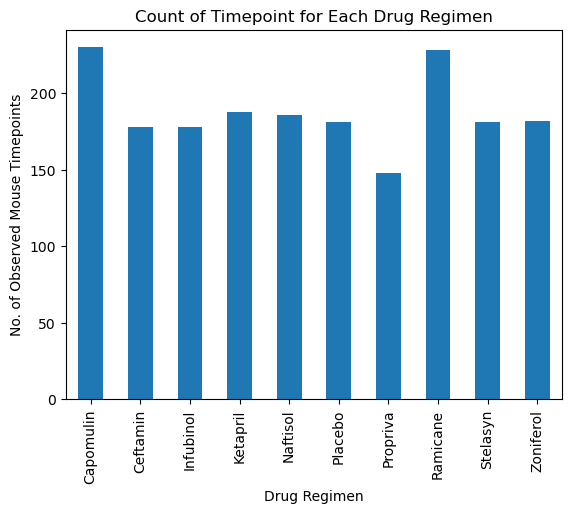

In [363]:
barplot_df.plot(kind='bar', legend=False)
plt.ylabel("No. of Observed Mouse Timepoints")
plt.title('Count of Timepoint for Each Drug Regimen')
plt.show()

In [364]:
#Matplotlib method

In [365]:
#define x_axis
x_axis = np.arange(len(barplot_df))
tick_locations = [value for value in x_axis]

In [366]:
#remove index
regimen_count = barplot_df.reset_index()
regimen_count

,Drug Regimen,Count
0,Capomulin,230
1,Ceftamin,178
2,Infubinol,178
3,Ketapril,188
4,Naftisol,186
5,Placebo,181
6,Propriva,148
7,Ramicane,228
8,Stelasyn,181
9,Zoniferol,182


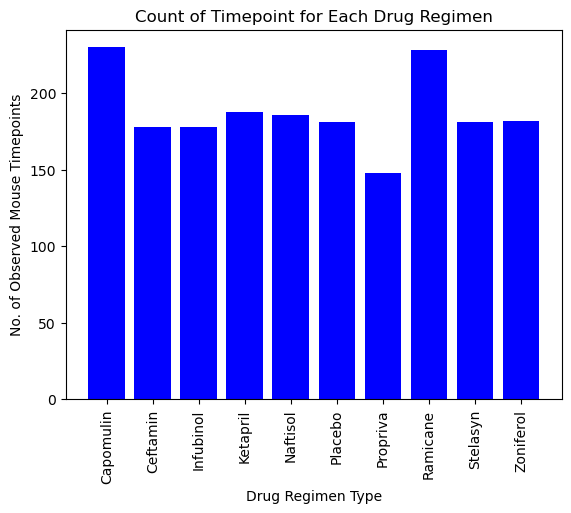

In [367]:
#plot bar graph
plt.bar(x_axis, regimen_count['Count'], color='b', align='center')
#add x ticker
plt.xticks(tick_locations, regimen_count['Drug Regimen'], rotation='vertical')
#axis labels
plt.xlabel('Drug Regimen Type')
plt.ylabel('No. of Observed Mouse Timepoints')
#title
plt.title('Count of Timepoint for Each Drug Regimen')
plt.show()

In [368]:
#PIE CHARTS

In [369]:
#group by sex
sex_grouped = cleaned_df.groupby(cleaned_df['Sex']).count()
sex_grouped

,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Sex,,,,,,,
Female,922,922,922,922,922,922,922
Male,958,958,958,958,958,958,958


In [370]:
#count of male mice
male_count = cleaned_df.loc[(cleaned_df['Sex']=='Male')].count()
male_count

Mouse ID              958
Drug Regimen          958
Sex                   958
Age_months            958
Weight (g)            958
Timepoint             958
Tumor Volume (mm3)    958
Metastatic Sites      958
dtype: int64

In [371]:
#count of female mice
female_count = cleaned_df.loc[(cleaned_df['Sex']=='Female')].count()
female_count

Mouse ID              922
Drug Regimen          922
Sex                   922
Age_months            922
Weight (g)            922
Timepoint             922
Tumor Volume (mm3)    922
Metastatic Sites      922
dtype: int64

In [372]:
#create list of gender count
sex = ['Female', 'Male']
sex_count = [922, 958]
sex_count

[922, 958]

In [373]:
#define pie chart arguments
colours = ['blue', 'orange']
explode = (0,0)

Text(0, 0.5, 'Sex')

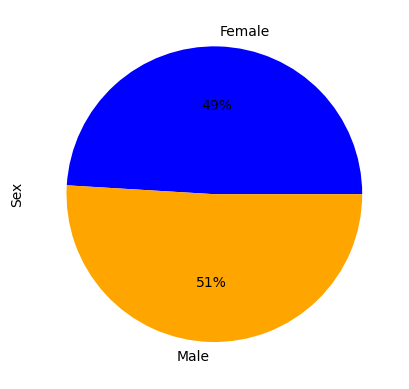

In [374]:
#plot pie graph using matplotlib
plt.pie(sex_count, explode=explode, labels=sex, colors=colours, autopct='%1.0f%%')
plt.ylabel('Sex')

In [375]:
#create df for gender and gender count
piechart_df = pd.DataFrame(index= sex)
piechart_df['Sex Count'] = sex_count
piechart_df

,Sex Count
Female,922
Male,958


<Axes: ylabel='Sex Count'>

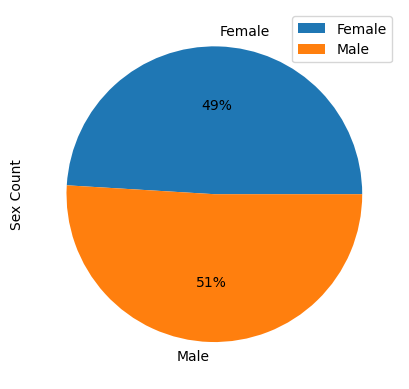

In [376]:
#plot lie chart using pandas
piechart_df.plot(kind='pie', y='Sex Count',autopct='%1.0f%%')

In [381]:
#filter for mice only on Capomulin, Ramicane, Infubinol and Ceftamin
drug_regimen = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
four_treatments_df = cleaned_df.loc[cleaned_df['Drug Regimen'].isin(drug_regimen),:]
four_treatments_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1868,z581,Infubinol,Female,24,25,25,54.316407,2
1869,z581,Infubinol,Female,24,25,30,56.286750,2
1870,z581,Infubinol,Female,24,25,35,58.628399,3
1871,z581,Infubinol,Female,24,25,40,60.053740,3


In [382]:
#find their last timepoint
last_timepoint_df = cleaned_df.groupby(test['Mouse ID'])['Timepoint'].max()
last_timepoint_df

Mouse ID
a203    45
a251    45
a275    45
a411    45
a444    45
        ..
y769    45
y793    45
y865    45
z578    45
z581    45
Name: Timepoint, Length: 100, dtype: int64

In [383]:
#merge last timepoint data with fulll data df
last_timepoint_merged = pd.merge(cleaned_df, last_timepoint_df, on='Mouse ID', how='outer')
last_timepoint_merged

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Timepoint_y
0,k403,Ramicane,Male,21,16,0,45.000000,0,45.0
1,k403,Ramicane,Male,21,16,5,38.825898,0,45.0
2,k403,Ramicane,Male,21,16,10,35.014271,1,45.0
3,k403,Ramicane,Male,21,16,15,34.223992,1,45.0
4,k403,Ramicane,Male,21,16,20,32.997729,1,45.0
...,...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2,NaN
1876,z969,Naftisol,Male,9,30,30,65.841013,3,NaN
1877,z969,Naftisol,Male,9,30,35,69.176246,4,NaN
1878,z969,Naftisol,Male,9,30,40,70.314904,4,NaN


In [384]:
#rename columns
last_timepoint_merged = last_timepoint_merged.rename(columns={'Timepoint_x': 'Timepoint', 'Timepoint_y': 'Last Timepoint'})
last_timepoint_merged

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Last Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45.0
1,k403,Ramicane,Male,21,16,5,38.825898,0,45.0
2,k403,Ramicane,Male,21,16,10,35.014271,1,45.0
3,k403,Ramicane,Male,21,16,15,34.223992,1,45.0
4,k403,Ramicane,Male,21,16,20,32.997729,1,45.0
...,...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2,NaN
1876,z969,Naftisol,Male,9,30,30,65.841013,3,NaN
1877,z969,Naftisol,Male,9,30,35,69.176246,4,NaN
1878,z969,Naftisol,Male,9,30,40,70.314904,4,NaN


In [385]:
#create lists
tumor_volume_data = []
drug_regimen

['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

In [386]:
#loop through each drug regimen and save tumor volume to list if it matches
for treatment in drug_regimen:
    tumor_volume_data.append(test_merged.loc[test_merged['Drug Regimen'] == treatment]['Tumor Volume (mm3)'])

In [387]:
tumor_volume_data

[10      45.000000
 11      43.878496
 12      37.614948
 13      38.177232
 14      36.866876
           ...    
 440     47.685963
 1439    45.000000
 1440    45.597064
 1441    46.059608
 1442    46.539206
 Name: Tumor Volume (mm3), Length: 230, dtype: float64,
 0      45.000000
 1      38.825898
 2      35.014271
 3      34.223992
 4      32.997729
          ...    
 449    43.166373
 450    45.000000
 451    45.877545
 452    46.378092
 453    44.183451
 Name: Tumor Volume (mm3), Length: 228, dtype: float64,
 454     45.000000
 455     48.508468
 456     51.852437
 457     52.777870
 458     55.173336
           ...    
 1855    54.316407
 1856    56.286750
 1857    58.628399
 1858    60.053740
 1859    62.754451
 Name: Tumor Volume (mm3), Length: 178, dtype: float64,
 484     45.000000
 485     46.795257
 486     47.371343
 487     49.734404
 488     50.513437
           ...    
 1838    57.173538
 1839    59.033275
 1840    61.153140
 1841    63.469549
 1842    64.729837
 Name: 

In [388]:
#save Capomulin volumes
cap_volume = tumor_volume_data[0]
cap_volume

10      45.000000
11      43.878496
12      37.614948
13      38.177232
14      36.866876
          ...    
440     47.685963
1439    45.000000
1440    45.597064
1441    46.059608
1442    46.539206
Name: Tumor Volume (mm3), Length: 230, dtype: float64

In [389]:
#save Ramicane volumes
ram_volume = tumor_volume_data[1]
ram_volume

0      45.000000
1      38.825898
2      35.014271
3      34.223992
4      32.997729
         ...    
449    43.166373
450    45.000000
451    45.877545
452    46.378092
453    44.183451
Name: Tumor Volume (mm3), Length: 228, dtype: float64

In [390]:
#save Infubinal volumes
inf_volume = tumor_volume_data[2]
inf_volume

454     45.000000
455     48.508468
456     51.852437
457     52.777870
458     55.173336
          ...    
1855    54.316407
1856    56.286750
1857    58.628399
1858    60.053740
1859    62.754451
Name: Tumor Volume (mm3), Length: 178, dtype: float64

In [391]:
#Save Ceftamin volumes
cef_volume = tumor_volume_data[3]
cef_volume

484     45.000000
485     46.795257
486     47.371343
487     49.734404
488     50.513437
          ...    
1838    57.173538
1839    59.033275
1840    61.153140
1841    63.469549
1842    64.729837
Name: Tumor Volume (mm3), Length: 178, dtype: float64

In [256]:
#Capomulin quartiles, IQR and upper/lower bounds
cap_quartiles = cap_volume.quantile([0.25, 0.5, 0.75])
cap_lowerq = cap_quartiles[0.25]
cap_upperq = cap_quartiles[0.75]
cap_iqr = cap_upperq - cap_lowerq
cap_lower_bound = cap_lowerq - (1.5*cap_iqr)
cap_upper_bound = cap_upperq + (1.5*cap_iqr)
print(f"Values below {cap_lower_bound} could be outliers")
print(f"Values above {cap_upper_bound} could be outliers")

Values below 26.714832162499995 could be outliers
Values above 55.9711007025 could be outliers


In [257]:
#find Capomulin outliers
cap_outlier = []
for value in cap_volume:
    if value > cap_upper_bound:
        cap_outlier.append(value)
    if value < cap_lower_bound:
        cap_outlier.append(value)
print(f'Capomulin potential outliers: {cap_outlier}')

Capomulin potential outliers: [25.47214326, 23.34359787]


In [258]:
#Ramicane quartiles, IQR and upper/lower bounds
ram_quartiles = ram_volume.quantile([0.25, 0.5, 0.75])
ram_lowerq = ram_quartiles[0.25]
ram_upperq = ram_quartiles[0.75]
ram_iqr = ram_upperq - ram_lowerq
ram_lower_bound = ram_lowerq - (1.5*ram_iqr)
ram_upper_bound = ram_upperq + (1.5*ram_iqr)
print(f"Values below {ram_lower_bound} could be outliers")
print(f"Values above {ram_upper_bound} could be outliers")

Values below 24.1865864625 could be outliers
Values above 57.488048122500004 could be outliers


In [259]:
#find Ramicane outliers
ram_outlier = []
for value in ram_volume:
    if value > ram_upper_bound:
        ram_outlier.append(value)
    if value < ram_lower_bound:
        ram_outlier.append(value)
print(f'Ramicane potential outliers: {ram_outlier}')

Ramicane potential outliers: [22.05012627]


In [260]:
#Infubinol quartiles, IQR and upper/lower bounds
inf_quartiles = inf_volume.quantile([0.25, 0.5, 0.75])
inf_lowerq = inf_quartiles[0.25]
inf_upperq = inf_quartiles[0.75]
inf_iqr = inf_upperq - inf_lowerq
inf_lower_bound = inf_lowerq - (1.5*inf_iqr)
inf_upper_bound = inf_upperq + (1.5*inf_iqr)
print(f"Values below {inf_lower_bound} could be outliers")
print(f"Values above {inf_upper_bound} could be outliers")

Values below 32.309217298749985 could be outliers
Values above 72.31757996875001 could be outliers


In [261]:
#find Infubinol outliers
inf_outlier = []
for value in inf_volume:
    if value > inf_upper_bound:
        inf_outlier.append(value)
    if value < inf_lower_bound:
        inf_outlier.append(value)
print(f'Infubinol potential outliers: {inf_outlier}')

Infubinol potential outliers: []


In [262]:
#Ceftamin quartiles, IQR and upper/lower bounds
cef_quartiles = cef_volume.quantile([0.25, 0.5, 0.75])
cef_lowerq = cef_quartiles[0.25]
cef_upperq = cef_quartiles[0.75]
cef_iqr = cef_upperq - cef_lowerq
cef_lower_bound = cef_lowerq - (1.5*cef_iqr)
cef_upper_bound = cef_upperq + (1.5*cef_iqr)
print(f"Values below {cef_lower_bound} could be outliers")
print(f"Values above {cef_upper_bound} could be outliers")

Values below 32.81891142624998 could be outliers
Values above 71.19095325625001 could be outliers


In [263]:
#find Ceftamin outliers
cef_outlier = []
for value in cef_volume:
    if value > cef_upper_bound:
        cef_outlier.append(value)
    if value < cef_lower_bound:
        cef_outlier.append(value)
print(f'Ceftamin potential outliers: {cef_outlier}')

Ceftamin potential outliers: []


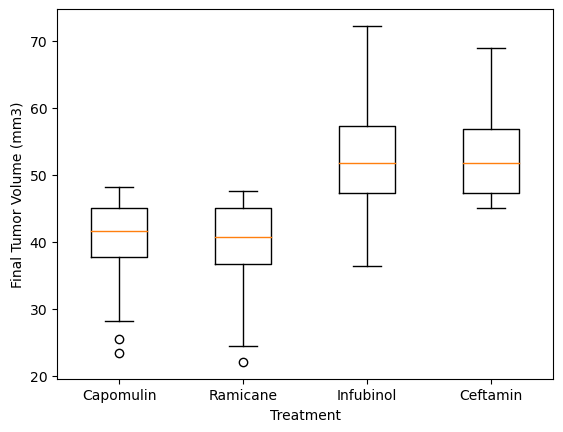

In [264]:
#plot boxplot
fig1, ax1 = plt.subplots()
ax1.set_xlabel('Treatment')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(tumor_volume_data, labels = drug_regimen)
plt.show()

In [265]:
#filter for one mouse with Capomulin
mouse_s185 = cleaned_df.loc[cleaned_df['Mouse ID'] == 's185']
mouse_s185

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


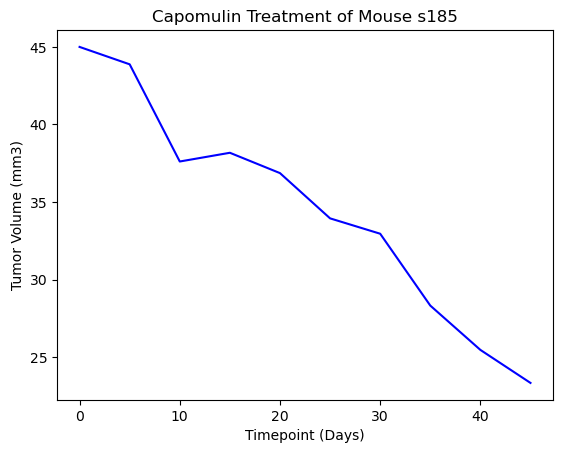

In [272]:
#plot line plot of tumor volume vs timepoint for s185
plt.plot(mouse_s185['Timepoint'], mouse_s185['Tumor Volume (mm3)'], color='b')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin Treatment of Mouse s185')
plt.show()

In [273]:
#filter for mice under Capomulin treatment
capomulin_treatment = cleaned_df.loc[cleaned_df['Drug Regimen'] == 'Capomulin']
capomulin_treatment

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [289]:
#unique mice ID's
cap_mice = capomulin_treatment['Mouse ID'].unique()
cap_mice

array(['s185', 'x401', 'm601', 'f966', 'u364', 'y793', 'r554', 'm957',
       't565', 'i738', 'w914', 'g288', 'l897', 'b742', 'b128', 'j246',
       'j119', 'w150', 'v923', 'g316', 's710', 'l509', 'r944', 'i557',
       'r157'], dtype=object)

In [298]:
#Capomulin tumor volume mean for each mouse
cap_vol_mean = capomulin_treatment.groupby(capomulin_treatment['Mouse ID'])['Tumor Volume (mm3)'].mean()
cap_vol_mean

Mouse ID
b128    41.963636
b742    40.083699
f966    36.505973
g288    41.990097
g316    44.613344
i557    44.805810
i738    39.141053
j119    44.465236
j246    43.216925
l509    44.434474
l897    42.507261
m601    34.847470
m957    39.049816
r157    45.798970
r554    36.509212
r944    43.367364
s185    34.559143
s710    42.803733
t565    39.328725
u364    39.887495
v923    41.581595
w150    41.384825
w914    41.352452
x401    36.182040
y793    38.506829
Name: Tumor Volume (mm3), dtype: float64

In [301]:
#weight of each mouse
cap_mouse_weight = capomulin_treatment.groupby(capomulin_treatment['Mouse ID'])['Weight (g)'].mean()
cap_mouse_weight

Mouse ID
b128    22.0
b742    21.0
f966    17.0
g288    19.0
g316    22.0
i557    24.0
i738    20.0
j119    23.0
j246    21.0
l509    21.0
l897    19.0
m601    17.0
m957    19.0
r157    25.0
r554    17.0
r944    25.0
s185    17.0
s710    23.0
t565    17.0
u364    17.0
v923    21.0
w150    23.0
w914    21.0
x401    15.0
y793    17.0
Name: Weight (g), dtype: float64

Text(0.5, 1.0, 'Capomulin Treatment: Mouse Weight vs Tumor Volume')

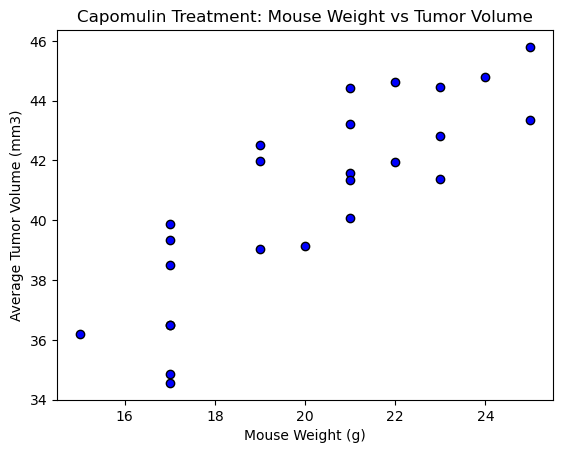

In [309]:
#plot scatter graph
plt.scatter(cap_mouse_weight, cap_vol_mean, marker='o', facecolors = 'b', edgecolors='black')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Capomulin Treatment: Mouse Weight vs Tumor Volume')
plt.show()

In [313]:
#find regression values and save them under variables
(slope, intercept, rvalue, pvalue, stderr) = linregress(cap_mouse_weight, cap_vol_mean)

In [315]:
print(f'The correlation between mouse weight and the average tumor volume is {rvalue}')

The correlation between mouse weight and the average tumor volume is 0.8419363424694721


In [318]:
#define regression values
regress_values = cap_mouse_weight * slope + intercept

In [320]:
#regression model equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

y = 0.95x + 21.55


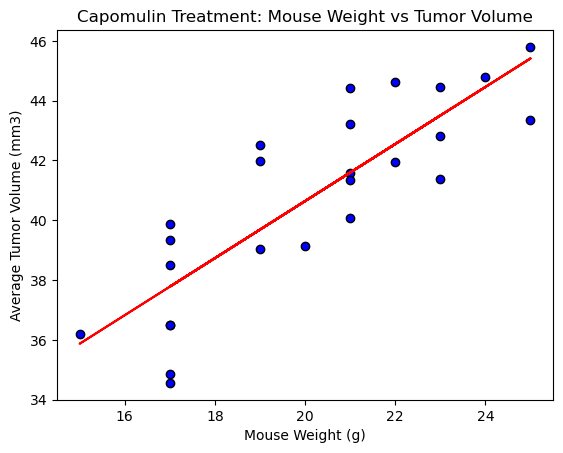

In [323]:
#plot scatter graph with with regression model
plt.scatter(cap_mouse_weight, cap_vol_mean, marker='o', facecolors = 'b', edgecolors='black')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Capomulin Treatment: Mouse Weight vs Tumor Volume')
plt.plot(cap_mouse_weight,regress_values,"r-")
plt.show()